<a href="https://colab.research.google.com/github/birajsth/MachineLearning-with-tensorflow/blob/master/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! git clone https://github.com/spMohanty/PlantVillage-Dataset


Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 49.08 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [0]:
! ls

PlantVillage-Dataset  sample_data


In [0]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = './PlantVillage-Dataset/raw/color'
width=256
height=256
depth=3


**Image** **to** **array**

In [0]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, default_image_size)
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
     print(f"Error : {e}")
     return None

**Fetching images fron directory**

In [0]:
image_list, label_list = [], []
try:
  print("[INFO] Loading images...")
  root_dir = listdir(directory_root)
  for directory in root_dir:
    # remove .DS_store from list
    if directory ==".DS_Store":
      root_dir.remove(directory)
    
  plant_disease_folder_list = listdir(f'{directory_root}')
  for disease_folder in plant_disease_folder_list:
    # remove .DS_Store from list
    if disease_folder == ".DS_Store":
      plant_disease_folder_list.remove(disease_folder)
  
  for plant_disease_folder in plant_disease_folder_list:
    print(f'[INFO] Processing {plant_disease_folder}...')
    plant_disease_image_list = listdir(f'{directory_root}/{plant_disease_folder}/')

    for single_plant_disease_image in plant_disease_image_list :
      if single_plant_disease_image == ".DS_Store":
        plant_disease_image_list.remove(single_plant_disease_image)
      
    for image in plant_disease_image_list[:200]:
      image_directory = f"{directory_root}/{plant_disease_folder}/{image}"
      if image_directory.endswith('.jpg') or image_directory.endswith('.JPG'):
        image_list.append(convert_image_to_array(image_directory))
        label_list.append(plant_disease_folder)
  print("[INFO] Image loading completed!")
except Exception as e:
  print(f'Error : {e}')


[INFO] Loading images...
Error : [Errno 2] No such file or directory: './PlantVillage-Dataset/raw/color'


In [0]:
len(image_list)

0

In [0]:
len(label_list)

0

**Transform Image Labels uisng Scikit Learn's LabelBinarizer**

In [0]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

ValueError: ignored

In [0]:
print(label_binarizer.classes_)

AttributeError: ignored

In [0]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [0]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [0]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[INFO] training network...


In [0]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=3, verbose=1
    )
model.save_weights('plantdisease_detection.h5')

In [0]:
model.save_weights('plantdisease_detection.h5')

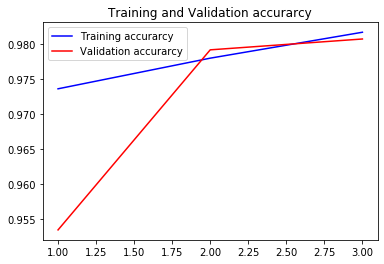

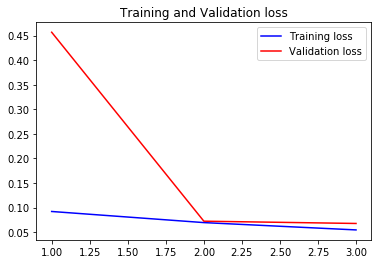

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [0]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1511/1511 [==============================] - 65s 43ms/step
Test Accuracy: 97.15942667857611


In [0]:
testimg = convert_image_to_array('./lateblight.jfif')

In [0]:
np_test = np.array([testimg,], dtype=np.float16) / 225.0


In [0]:
model.load_weights('plantdisease_detection.h5')

In [0]:
model.predict(np_test)

array([[1.86064106e-04, 1.40045631e-05, 5.29808221e-06, 9.34978428e-10,
        2.14997286e-04, 2.66342060e-08, 1.42798468e-04, 5.44910945e-05,
        4.98296842e-02, 6.41243219e-07, 9.47958291e-01, 4.56224569e-09,
        4.13506740e-07, 3.63974912e-08, 1.48799950e-09, 1.18631544e-03,
        3.11815573e-09, 2.75572436e-08, 2.75544618e-04, 1.12695707e-04,
        6.50643450e-09, 6.35108340e-13, 2.54433485e-06, 5.15596980e-07,
        1.28892665e-08, 3.80118248e-09, 3.41865247e-09, 7.99976196e-11,
        2.06818225e-08, 1.66212047e-07, 2.00031945e-06, 1.04165077e-08,
        5.53935231e-10, 1.36619242e-12, 1.33601229e-11, 1.33103113e-05,
        2.16147917e-08, 1.06491516e-09]], dtype=float32)

In [0]:
binarizer = pickle.load(open('label_transform.pkl', 'rb'))

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

In [0]:
binarizer.inverse_transform(model.predict(np_test))

array(['Corn_(maize)___healthy'], dtype='<U50')